In [3]:
from tensorboard.backend.event_processing import event_accumulator
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [4]:
path = 'output/runs/'

path_2 = 'output_40m/runs/'

In [5]:
runs = ['Apr24_00-28-35_clip-g2-1.cbe.vbc.ac.at',
        'Apr24_10-43-23_clip-g1-0.cbe.vbc.ac.at',
       ]

runs2 = ['Apr24_15-21-40_clip-g1-0.cbe.vbc.ac.at',
        ]

runs3 = ['Apr25_16-11-03_clip-g2-3.cbe.vbc.ac.at',
         'Apr26_00-13-08_clip-g1-0.cbe.vbc.ac.at',
        ]

runs4 = ['Apr25_16-20-59_clip-g1-0.cbe.vbc.ac.at',
         'Apr25_22-31-57_clip-g1-0.cbe.vbc.ac.at',
         'Apr26_10-11-15_clip-g1-0.cbe.vbc.ac.at',
        ]

In [9]:
eas = [event_accumulator.EventAccumulator(path + r,
                                        size_guidance={ # see below regarding this argument
                                            event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                                            event_accumulator.IMAGES: 4,
                                            event_accumulator.AUDIO: 4,
                                            event_accumulator.SCALARS: 0,
                                            event_accumulator.HISTOGRAMS: 1,
                                        }) for r in runs]

eas2 = [event_accumulator.EventAccumulator(path + r,
                                        size_guidance={ # see below regarding this argument
                                            event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                                            event_accumulator.IMAGES: 4,
                                            event_accumulator.AUDIO: 4,
                                            event_accumulator.SCALARS: 0,
                                            event_accumulator.HISTOGRAMS: 1,
                                        }) for r in runs2]

eas3 = [event_accumulator.EventAccumulator(path + r,
                                        size_guidance={ # see below regarding this argument
                                            event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                                            event_accumulator.IMAGES: 4,
                                            event_accumulator.AUDIO: 4,
                                            event_accumulator.SCALARS: 0,
                                            event_accumulator.HISTOGRAMS: 1,
                                        }) for r in runs3]

eas4 = [event_accumulator.EventAccumulator(path_2 + r,
                                        size_guidance={ # see below regarding this argument
                                            event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                                            event_accumulator.IMAGES: 4,
                                            event_accumulator.AUDIO: 4,
                                            event_accumulator.SCALARS: 0,
                                            event_accumulator.HISTOGRAMS: 1,
                                        }) for r in runs4]

In [10]:
for eas_ in [eas, eas2, eas3, eas4]:
    for ea in eas_:
        ea.Reload()

In [21]:
eas3[0].Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['train/loss',
  'train/learning_rate',
  'train/epoch',
  'eval/loss',
  'eval/runtime',
  'eval/samples_per_second',
  'eval/steps_per_second'],
 'distributions': [],
 'tensors': ['args/text_summary', 'model_config/text_summary'],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [24]:
eval_loss = [np.array([[sc.step, sc.value, sc.wall_time] for sc in ea_.Scalars('eval/loss')]) for ea_ in eas]
eval_loss2 = [np.array([[sc.step, sc.value, sc.wall_time] for sc in ea_.Scalars('eval/loss')]) for ea_ in eas2]
eval_loss3 = [np.array([[sc.step, sc.value, sc.wall_time] for sc in ea_.Scalars('eval/loss')]) for ea_ in eas3]
eval_loss4 = [np.array([[sc.step, sc.value, sc.wall_time] for sc in ea_.Scalars('eval/loss')]) for ea_ in eas4]

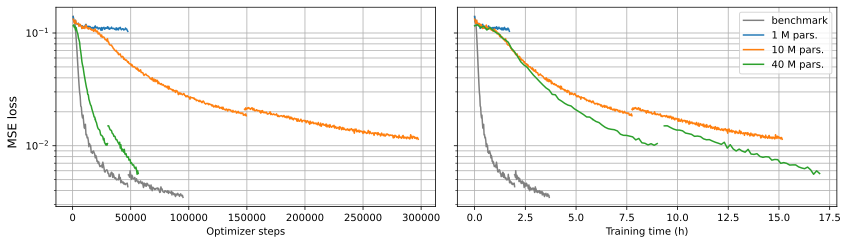

In [51]:
fig, axes = plt.subplots(1,2,figsize=(12,3.5), sharey=True)

all_start = eval_loss[0][0,2]
end = all_start
for i in range(len(eval_loss)):
    start = eval_loss[i][0,2]
    axes[0].plot(eval_loss[i][:,0], eval_loss[i][:,1], color='grey')
    axes[1].plot((eval_loss[i][:,2] - start + end - all_start)/3600, eval_loss[i][:,1], label= 'benchmark' if i == 0 else None, color='grey')
    end = eval_loss[i][-1,2] 

all_start = eval_loss2[0][0,2]
end = all_start
for i in range(len(eval_loss2)):
    start = eval_loss2[i][0,2]
    axes[0].plot(eval_loss2[i][:,0], eval_loss2[i][:,1], color='C0')
    axes[1].plot((eval_loss2[i][:,2] - start + end - all_start)/3600, eval_loss2[i][:,1], label= '1 M pars.' if i == 0 else None, color='C0')
    end = eval_loss2[i][-1,2]

all_start = eval_loss3[0][0,2]
end = all_start
for i in range(len(eval_loss3)):
    start = eval_loss3[i][0,2]
    axes[0].plot(eval_loss3[i][:,0], eval_loss3[i][:,1], color='C1')
    axes[1].plot((eval_loss3[i][:,2] - start + end - all_start)/3600, eval_loss3[i][:,1], label= '10 M pars.' if i == 0 else None, color='C1')
    end = eval_loss3[i][-1,2]

all_start = eval_loss4[0][0,2]
end = all_start
for i in range(len(eval_loss4)):
    start = eval_loss4[i][0,2]
    axes[0].plot(eval_loss4[i][:,0], eval_loss4[i][:,1], color='C2')
    axes[1].plot((eval_loss4[i][:,2] - start + end - all_start)/3600, eval_loss4[i][:,1], label= '40 M pars.' if i == 0 else None, color='C2')
    end = eval_loss4[i][-1,2]

plt.legend(frameon=True, )
fig.supylabel('MSE loss')
axes[0].set_xlabel('Optimizer steps')
axes[1].set_xlabel('Training time (h)')
plt.yscale('log')
for i in range(2):
    axes[i].grid(which='major')
    axes[i].grid(which='minor')
plt.tight_layout()
plt.savefig('plots_paper/loss_transformer.png', dpi=300)
plt.show()